<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Fast Food Chains and Price Discrimination

_Authors: Kiefer Katovich (SF), Mario Carrillo (SF)_

---

This group lab uses a 1994 data set of detailed prices on items sold at more than 400 Burger King, Wendy's, KFC, and [Roy Rogers](https://en.wikipedia.org/wiki/Roy_Rogers_Restaurants) restaurants in New Jersey and Pennsylvania.

The data set is a restricted version of the data set used in this publication:

> [K. Graddy (1997), "Do Fast-Food Chains Price Discriminate on the Race and Income Characteristics of an Area?" Journal of Business and Economic Statistics 15, 391-401](http://people.brandeis.edu/~kgraddy/published%20papers/GraddyK_jbes1997.pdf).

**The goal of this exercise is to evaluate whether or not fast food restaurants are using discriminatory pricing.** This is a fairly open-ended prompt. It's up to you to determine how to quantify pricing discrimination using the following groups of variables:
- The price of fast food items, which can be a metric of discriminatory practices.
- The proportion of African Americans residents, low-income residents, and residents without a car.

---

### In Groups, You Should:

1) **Load and examine the data.**

2) **Perform any necessary data cleaning.**

3) **Conduct an exploratory data analysis relevant to the goals of the project.** What variables are you interested in for your target(s) and predictors? What types of relationships do you see in the data that will inform your analysis?

4) **Formulate and formally define your hypotheses.** Based on the prompt and your EDA, come up with a plan for testing each one.

5) **Construct regression models to test each hypothesis.** What are your findings? Do they support the hypothesis? What are the limitations and assumptions of your approach? 

6) **[Bonus] Cross-validate the results of your regression.** If the results support your hypotheses, do they hold up during cross-validation or a train/test split?

7) **Prepare a brief (10-minute) presentation on the findings.** Each group's presentation should include your questions, models, and findings.
    - Be concise! Only include relevant information in your presentation.
    - Visuals are nice, but don't overdo it.
    - Don't just talk about your model's significance or metrics. Interpret the coefficients. What are the implications?
    - What future hypotheses could you test going forward?


> *Note*: If you are interested, the full data set is also available in the "datasets" folder under the name `discrim_full.csv`.

### Data Set Characteristics

    :Number of Instances: 410
    
    :Attribute Information
    
    psoda         price of medium soda
    pfries        price of small fries
    pentree       price entree (burger or chicken)
    wagest        starting wage
    nmgrs         number of managers
    nregs         number of registers
    hrsopen       hours open
    emp           number of employees
    compown       =1 if company owned
    chain         BK = 1, KFC = 2, Roy Rogers = 3, Wendy's = 4
    density       population density, town
    crmrte        crime rate, town
    state         NJ = 1, PA = 2
    prpblck       proportion black, zipcode
    prppov        proportion in poverty, zipcode
    prpncar       proportion no car, zipcode
    hseval        median housing value, zipcode
    nstores       number of stores, zipcode
    income        median family income, zipcode
    county        county label
    NJ            =1 for New Jersey
    BK            =1 if Burger King
    KFC           =1 if Kentucky Fried Chicken
    RR            =1 if Roy Rogers

In [1]:
# Data modules
import numpy as np
import scipy.stats as stats
import pandas as pd
from statsmodels.regression.linear_model import OLS

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/regressions packages
from sklearn import linear_model
from sklearn.metrics import r2_score

# Make sure your charts appear in the notebook
%matplotlib inline
%config InlineBackend.figure_format ='retina'

### Load the data

In [3]:
df = pd.read_csv('../datasets/discrim.csv')

In [4]:
df.shape

(410, 24)

In [5]:
df.sample(10)

psoda  pfries  pentree  wagest  nmgrs  nregs  hrsopen   emp  compown  \
138   1.12    1.02     0.95    4.75    4.0    5.0     16.0  20.0        0   
105   1.17    0.95     0.95    4.25    3.0    4.0     18.0  13.5        0   
112   1.12    1.02     1.06    4.25    3.0    4.0     17.0  18.0        1   
42    1.01    0.95     1.03    5.00    4.0    6.0     15.5  20.0        1   
119   1.06    0.95     0.95    4.65    3.0    3.0     16.0   NaN        0   
214   1.06    0.92     0.92     NaN    3.0    5.0     17.0  14.0        1   
211   1.06    0.91     1.12    4.75    4.0    5.0     16.0  12.5        1   
407   0.97    0.84     0.91    4.25    4.0    3.0     18.0  35.0        0   
115   1.20    1.06     1.06    4.50    3.0    5.0     17.0  23.5        1   
92     NaN     NaN      NaN    4.25    3.0    3.0     17.0  23.0        0   

     chain ...    prppov   prpncar    hseval  nstores   income  county  NJ  \
138      3 ...  0.024982  0.079898  168300.0        3  58039.0      19   1   
105      1 ...  0.128561  0.227659  142200.0        2  31639.0      24   1   
112      3 ...  0.025046  0.075463  204700.0        3  52919.0       2   1   
42       1 ...  0.023415  0.039216  186800.0        1  41196.0       2   1   
119      1 ...  0.022337  0.073892  207300.0        1  53168.0       2   1   
214      1 ...  0.020293  0.017128  148900.0        3  57055.0       5   1   
211      3 ...  0.028208  0.061078   95000.0        1  39509.0       5   1   
407      1 ...  0.057362  0.100693   98200.0        4  40585.0      20   0   
115      3 ...  0.033148  0.096738  183500.0        1  51288.0       2   1   
92       1 ...  0.035029  0.025974  275900.0        3  64367.0       2   1   

     BK  KFC  RR  
138   0    0   1  
105   1    0   0  
112   0    0   1  
42    1    0   0  
119   1    0   0  
214   1    0   0  
211   0    0   1  
407   1    0   0  
115   0    0   1  
92    1    0   0  

[10 rows x 24 columns]

### Data cleaning

In [6]:
df.describe(include='all')

psoda      pfries     pentree      wagest       nmgrs       nregs  \
count  402.000000  393.000000  398.000000  390.000000  404.000000  388.000000   
mean     1.044876    0.921985    1.322186    4.615641    3.420297    3.608247   
std      0.088687    0.105881    0.643085    0.347015    1.018408    1.243540   
min      0.730000    0.670000    0.490000    4.250000    1.000000    1.000000   
25%      0.980000    0.850000    0.950000    4.250000    3.000000    3.000000   
50%      1.060000    0.930000    1.020000    4.500000    3.000000    3.000000   
75%      1.085000    1.000000    1.470000    4.950000    4.000000    4.000000   
max      1.490000    1.270000    3.950000    5.750000   10.000000    8.000000   

          hrsopen         emp     compown       chain     ...          prppov  \
count  410.000000  404.000000  410.000000  410.000000     ...      409.000000   
mean    14.439024   17.621906    0.343902    2.117073     ...        0.071297   
std      2.809987    9.423264    0.475589    1.110497     ...        0.067439   
min      7.000000    3.000000    0.000000    1.000000     ...        0.004298   
25%     12.000000   11.375000    0.000000    1.000000     ...        0.029710   
50%     15.500000   16.375000    0.000000    2.000000     ...        0.044441   
75%     16.000000   21.000000    1.000000    3.000000     ...        0.082159   
max     24.000000   80.000000    1.000000    4.000000     ...        0.418480   

          prpncar         hseval     nstores         income      county  \
count  409.000000     409.000000  410.000000     409.000000  410.000000   
mean     0.114874  147399.266504    3.139024   47053.784841   13.658537   
std      0.117416   56070.467520    1.809426   13179.286069    8.045439   
min      0.000000   33900.000000    1.000000   15919.000000    1.000000   
25%      0.043531  107900.000000    2.000000   37883.000000    6.000000   
50%      0.073892  142300.000000    3.000000   46272.000000   14.000000   
75%      0.123482  176800.000000    4.000000   54981.000000   20.000000   
max      0.627238  473400.000000    8.000000  136529.000000   29.000000   

               NJ          BK         KFC          RR  
count  410.000000  410.000000  410.000000  410.000000  
mean     0.807317    0.417073    0.195122    0.241463  
std      0.394888    0.493678    0.396779    0.428493  
min      0.000000    0.000000    0.000000    0.000000  
25%      1.000000    0.000000    0.000000    0.000000  
50%      1.000000    0.000000    0.000000    0.000000  
75%      1.000000    1.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 24 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 24 columns):
psoda      402 non-null float64
pfries     393 non-null float64
pentree    398 non-null float64
wagest     390 non-null float64
nmgrs      404 non-null float64
nregs      388 non-null float64
hrsopen    410 non-null float64
emp        404 non-null float64
compown    410 non-null int64
chain      410 non-null int64
density    409 non-null float64
crmrte     409 non-null float64
state      410 non-null int64
prpblck    409 non-null float64
prppov     409 non-null float64
prpncar    409 non-null float64
hseval     409 non-null float64
nstores    410 non-null int64
income     409 non-null float64
county     410 non-null int64
NJ         410 non-null int64
BK         410 non-null int64
KFC        410 non-null int64
RR         410 non-null int64
dtypes: float64(15), int64(9)
memory usage: 77.0 KB


In [8]:
# If droping values with at least one null value
len(df.dropna(how='any'))

338

In [9]:
# If first removing the column nregs (probably not useful)
# and then droping values with at least one null value

In [10]:
len(df.drop('nregs',axis=1).dropna(how='any'))

356

In [11]:
df = df.drop('nregs',axis=1).dropna(how='any')

In [12]:
df[['state','NJ']].corr()

state   NJ
state    1.0 -1.0
NJ      -1.0  1.0

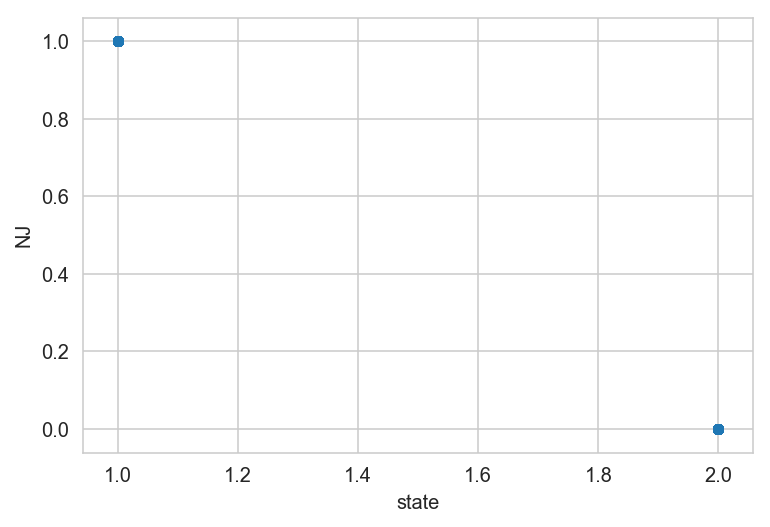

In [13]:
df[['state','NJ']].plot(kind='scatter',x='state',y='NJ')

Let's clean the state

In [14]:
# Let's remove state and remove NJ to "state_NJ"
df.drop('NJ',axis=1,inplace=True)
df['state'] = df['state'].apply(lambda x: 'NJ' if x==1 else ('PA' if x==2 else np.nan))

In [15]:
df.drop(['BK','KFC','RR'],axis=1,inplace=True)

In [16]:
num2chain = {1:'BK', 2:'KFC', 3:'RoyRogers', 4:'Wendy'}

df['chain'] = df['chain'].apply(lambda x: num2chain[x])

### Investigate the data

Text(0.5,1,'Income by state')

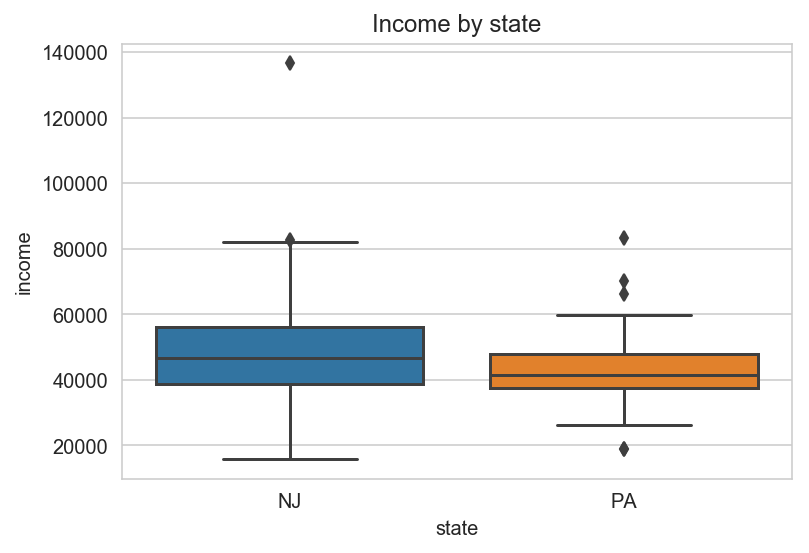

In [17]:
sns.boxplot(data=df,x='state',y='income')
plt.title('Income by state')

In [18]:
df.groupby('state').size()

state
NJ    286
PA     70
dtype: int64

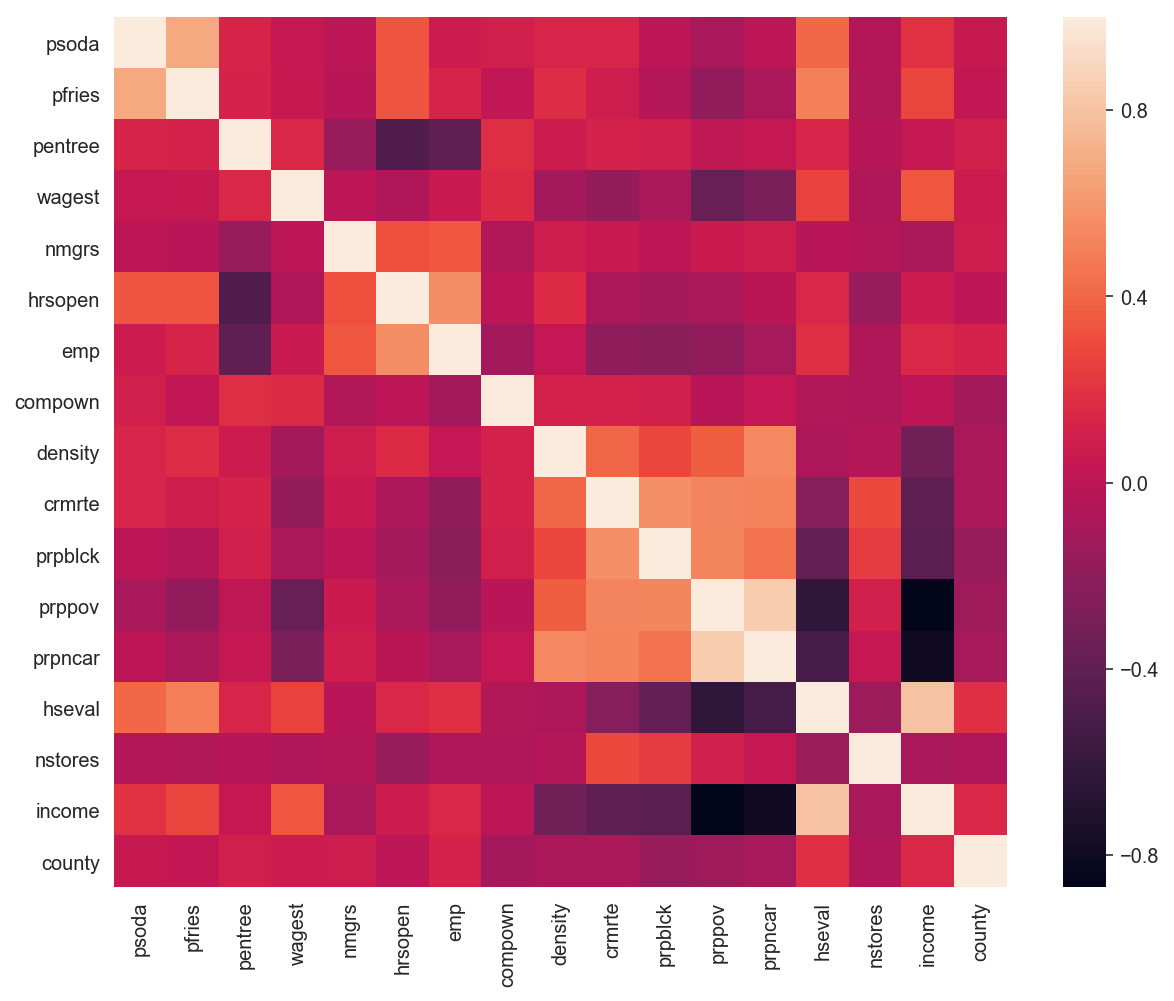

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman'))

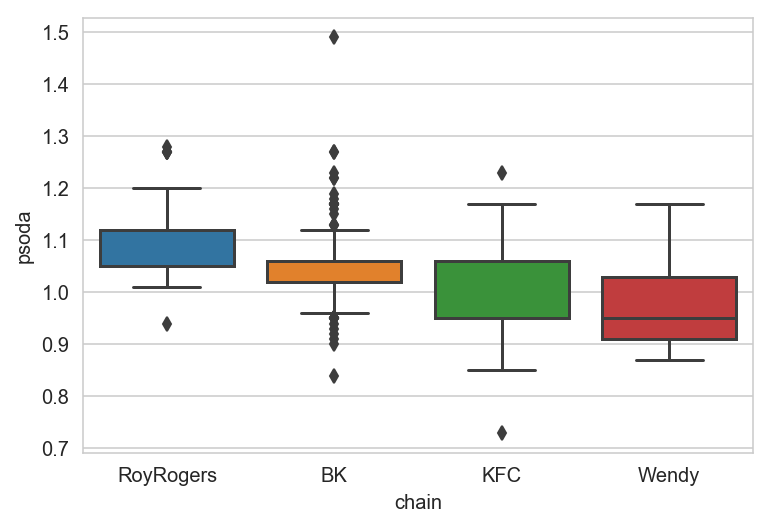

In [20]:
sns.boxplot(data=df,x='chain',y='psoda')
#plt.title('Income by state')

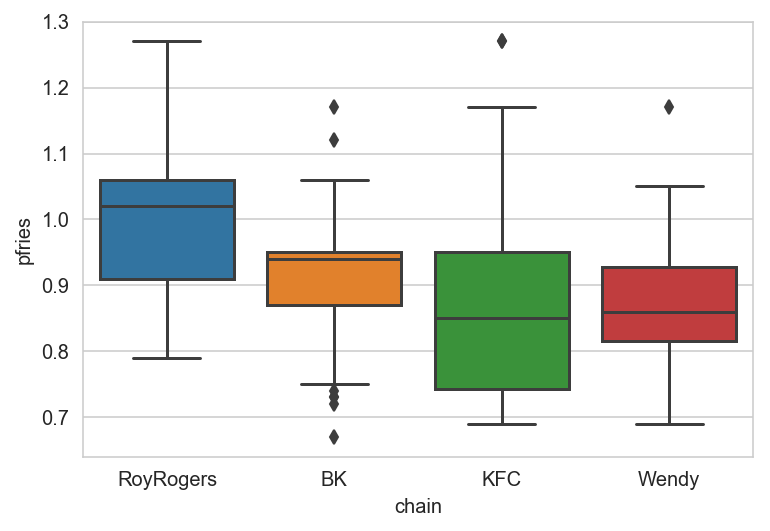

In [21]:
sns.boxplot(data=df,x='chain',y='pfries')

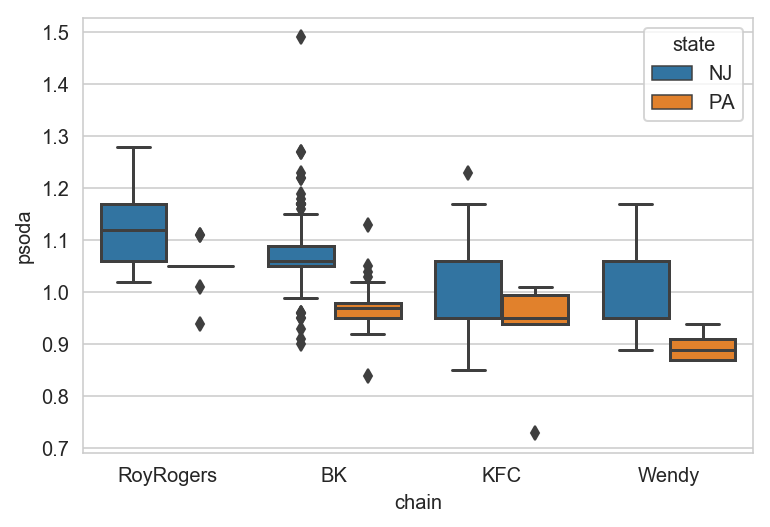

In [22]:
sns.boxplot(data=df,x='chain',y='psoda',hue='state')

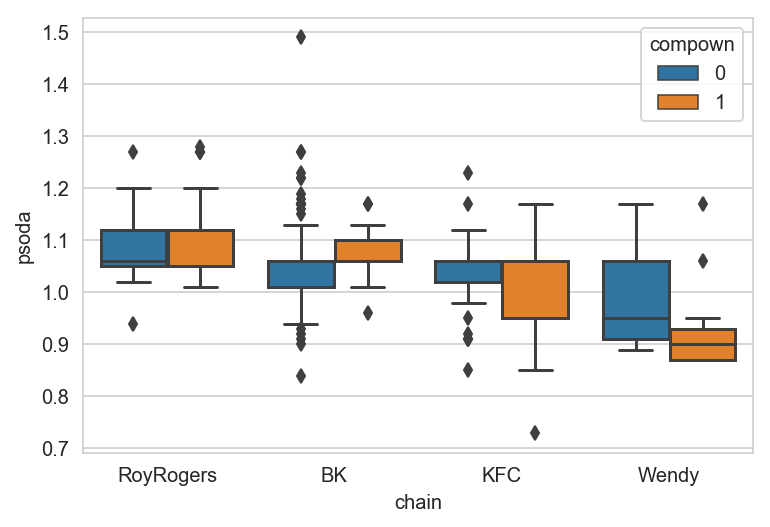

In [23]:
sns.boxplot(data=df,x='chain',y='psoda',hue='compown')

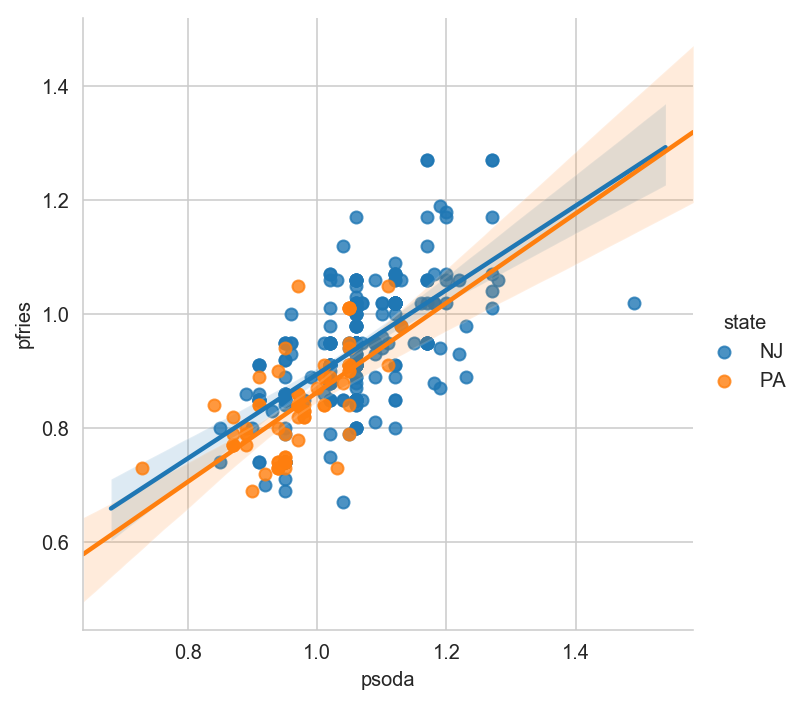

In [24]:
sns.lmplot(data=df,x='psoda',y='pfries',hue='state')

In [25]:
for c in df.columns:
    print(c,len(df[c].unique()))

psoda 39
pfries 43
pentree 68
wagest 31
nmgrs 11
hrsopen 23
emp 89
compown 2
chain 4
density 187
crmrte 185
state 2
prpblck 217
prppov 222
prpncar 222
hseval 206
nstores 8
income 221
county 29


In [26]:
features_cat = ['compown','chain','state','county']
features_num = [c for c in df.columns if c not in features_cat]

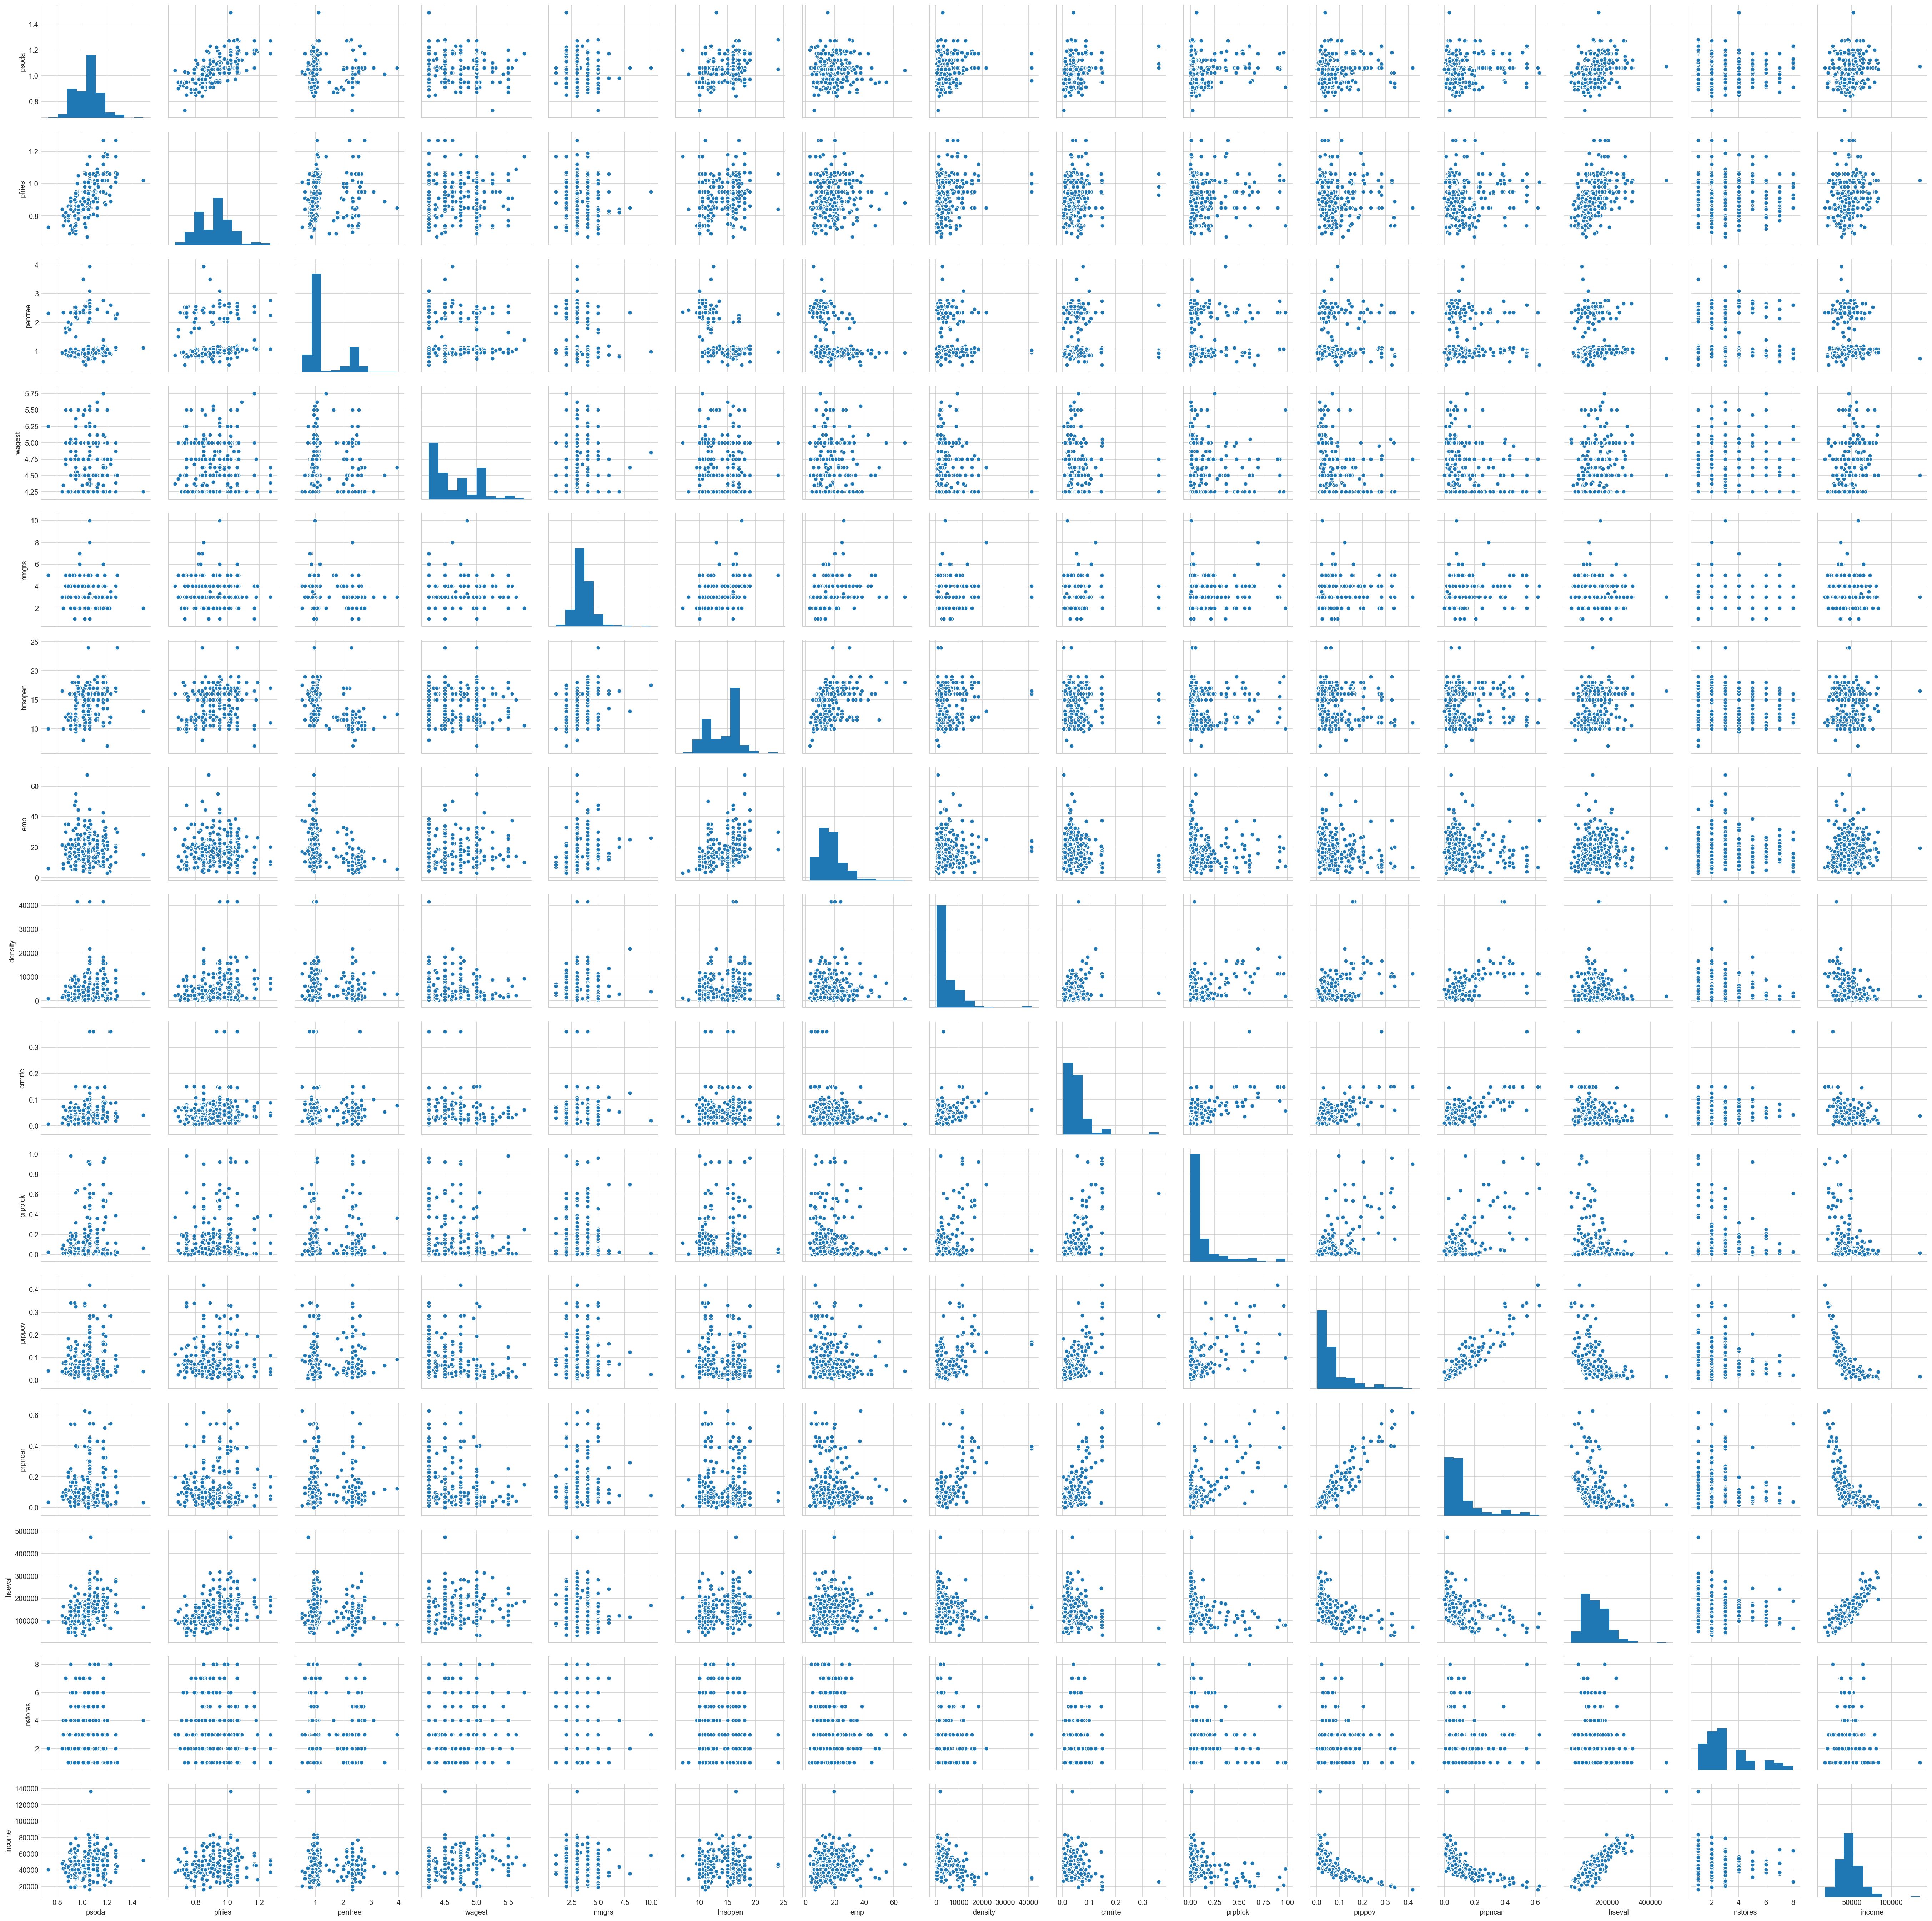

In [83]:
sns.pairplot(data=df[features_num])

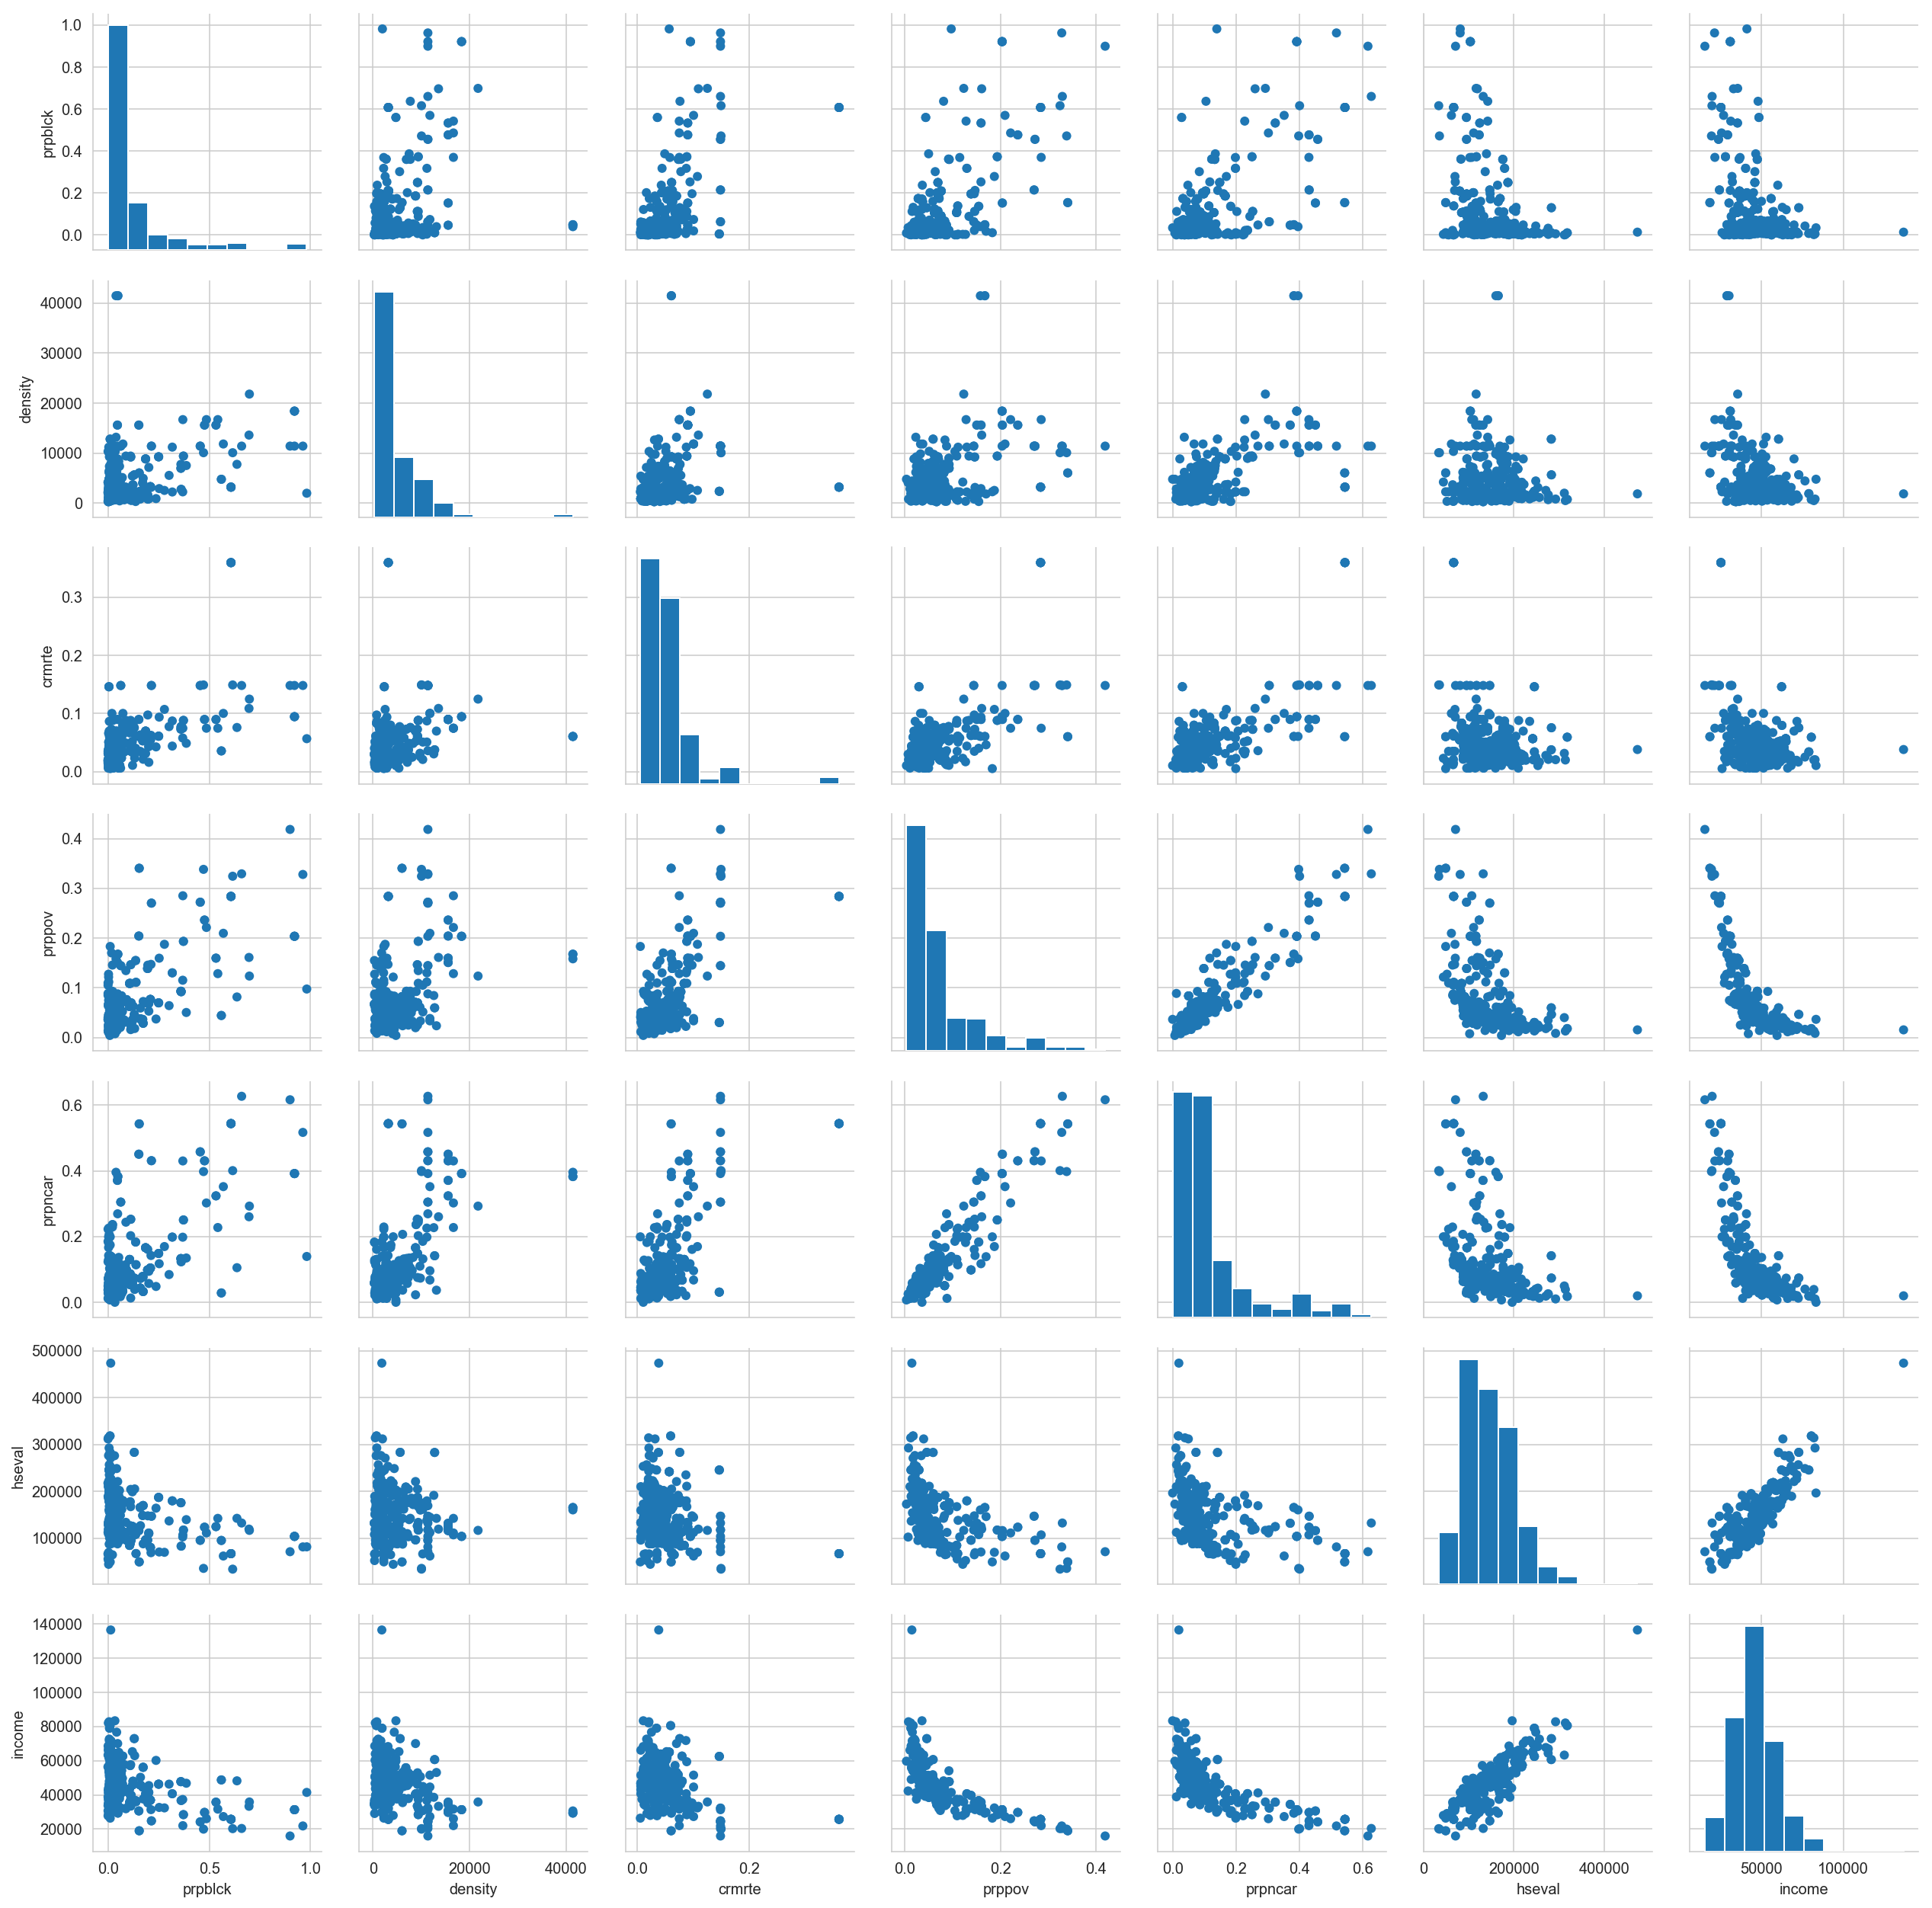

In [27]:
feat_temp = ['prpblck',
             'density',
            'crmrte',
            'prppov',
            'prpncar',
            'hseval',
            'income']

sns.pairplot(data=df[feat_temp],plot_kws={'edgecolor':'None'})

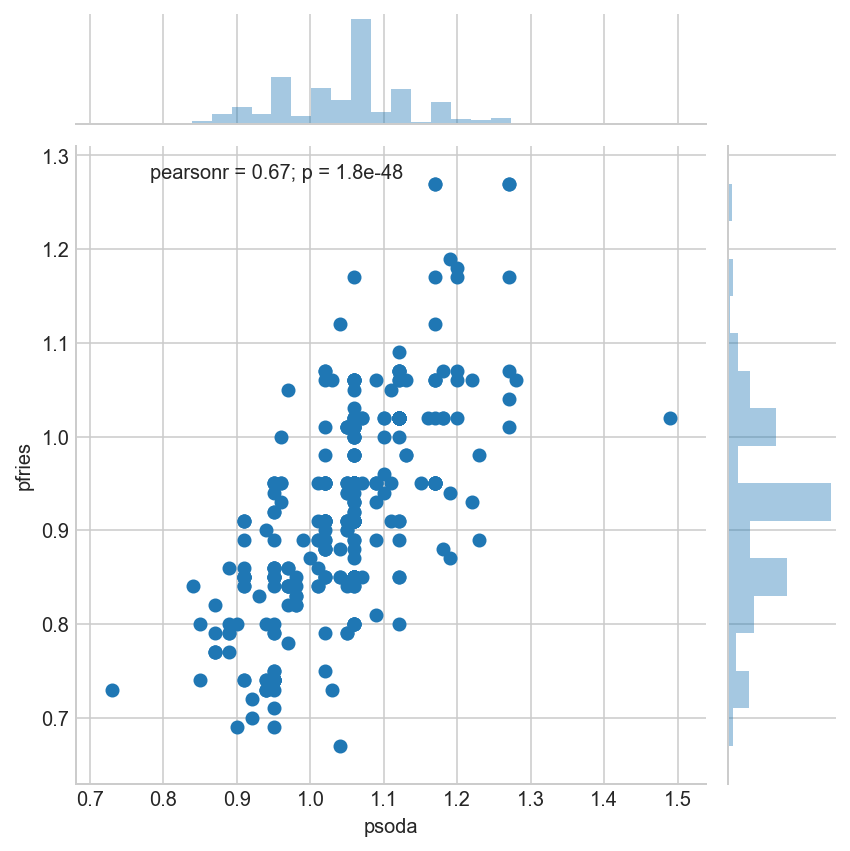

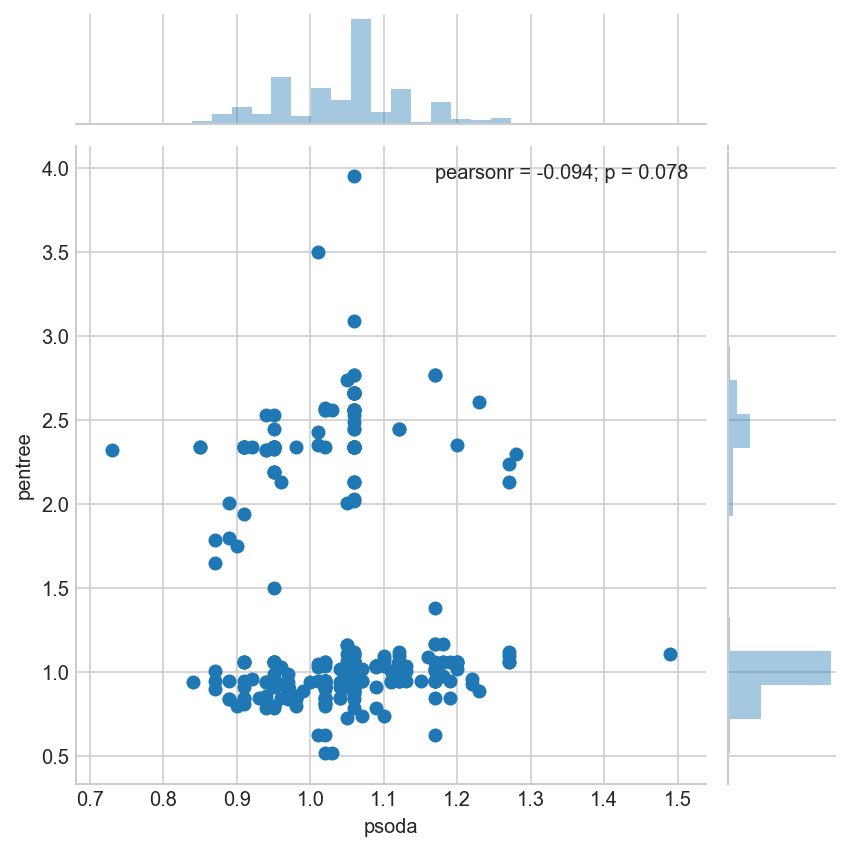

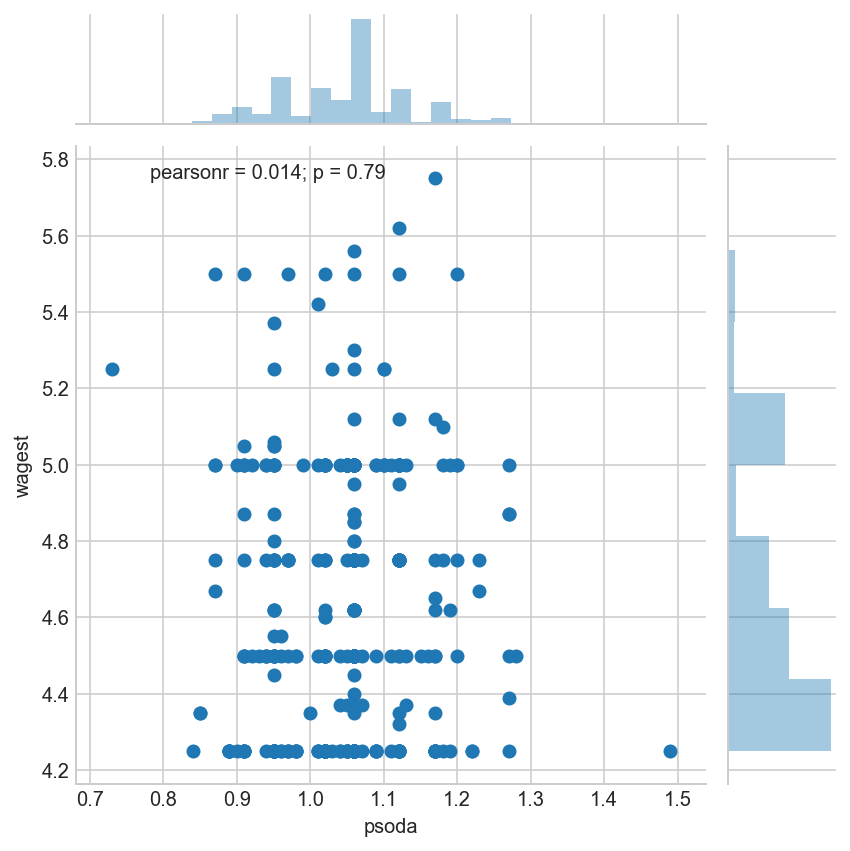

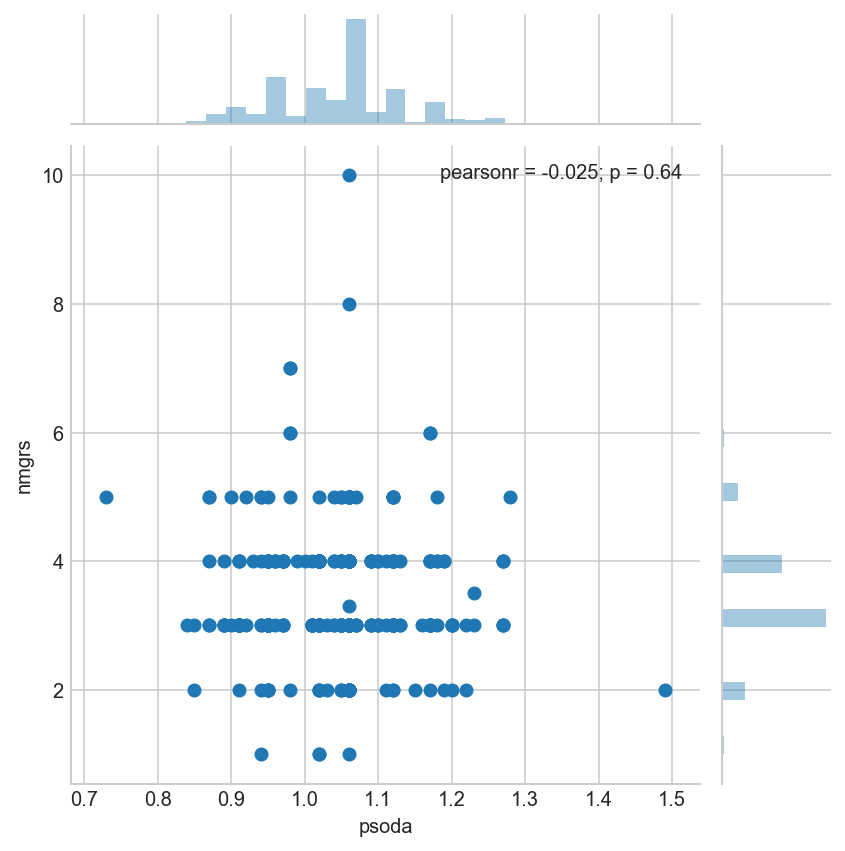

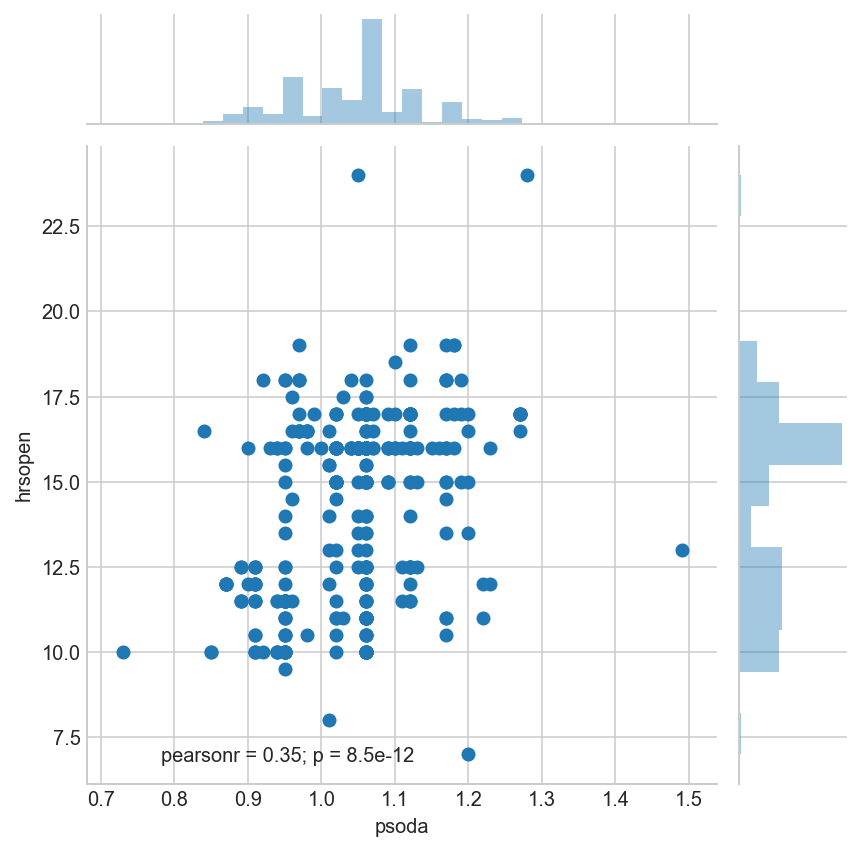

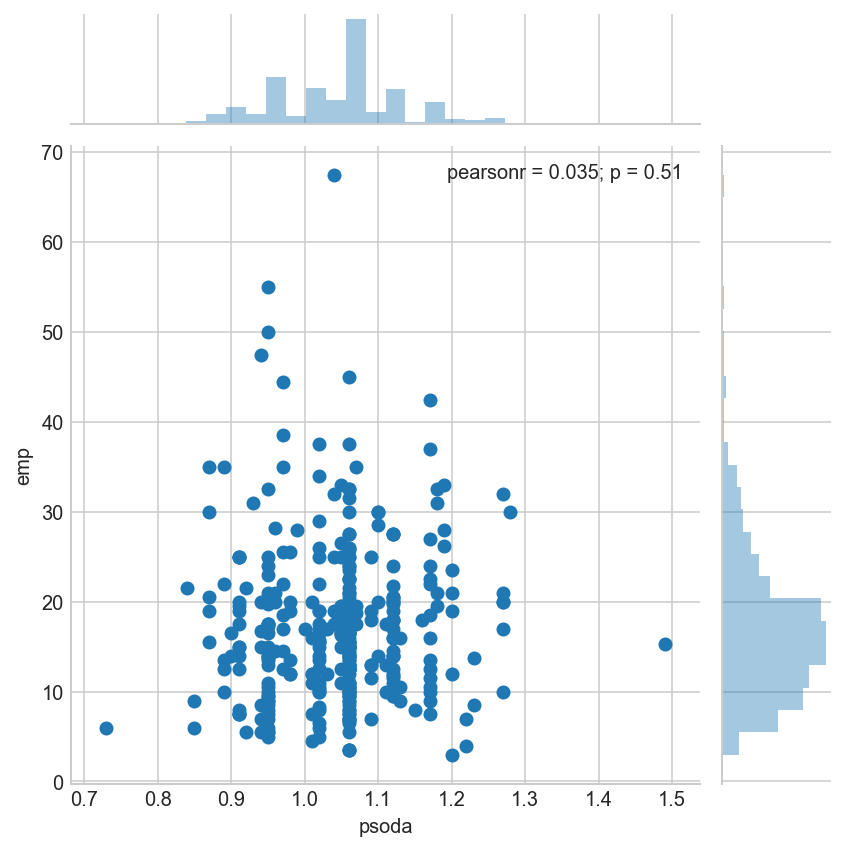

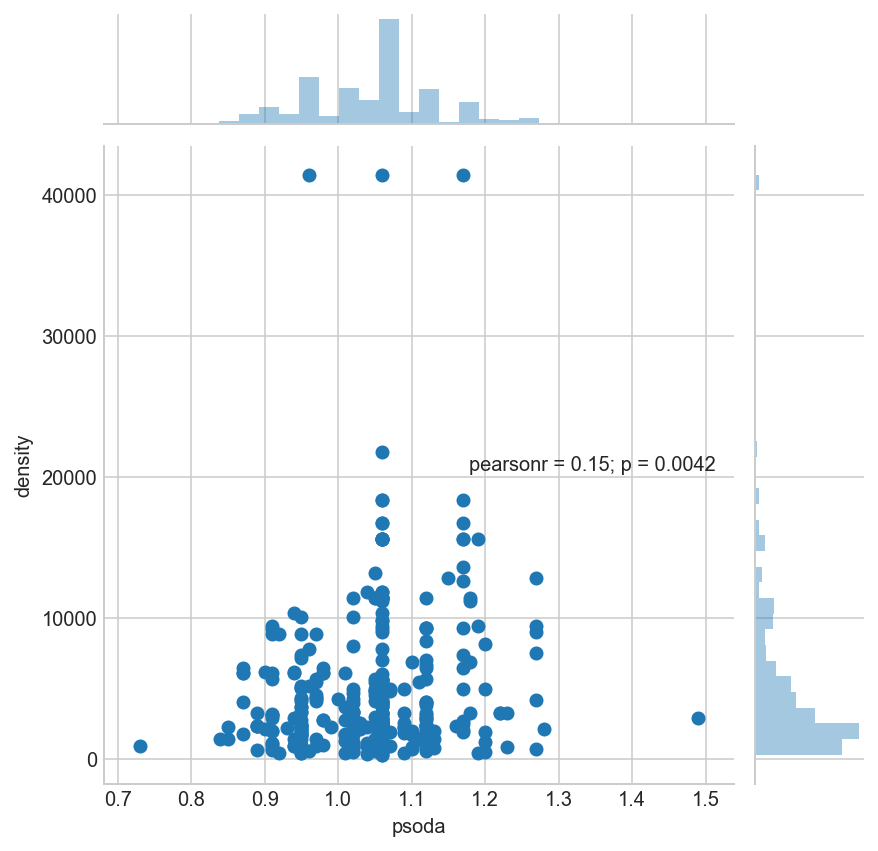

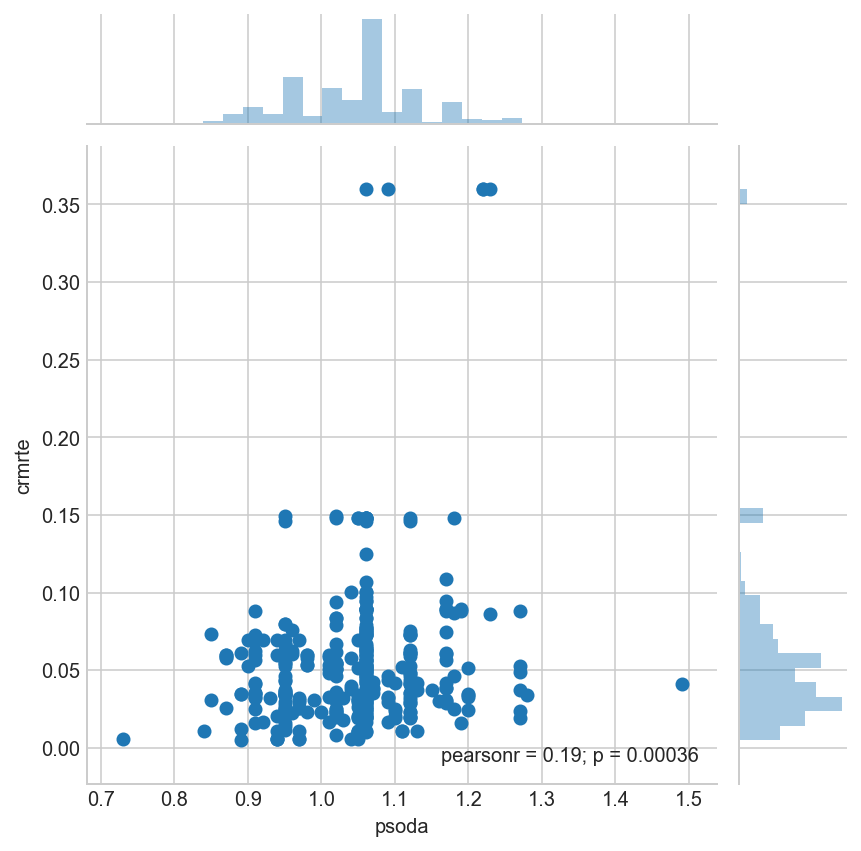

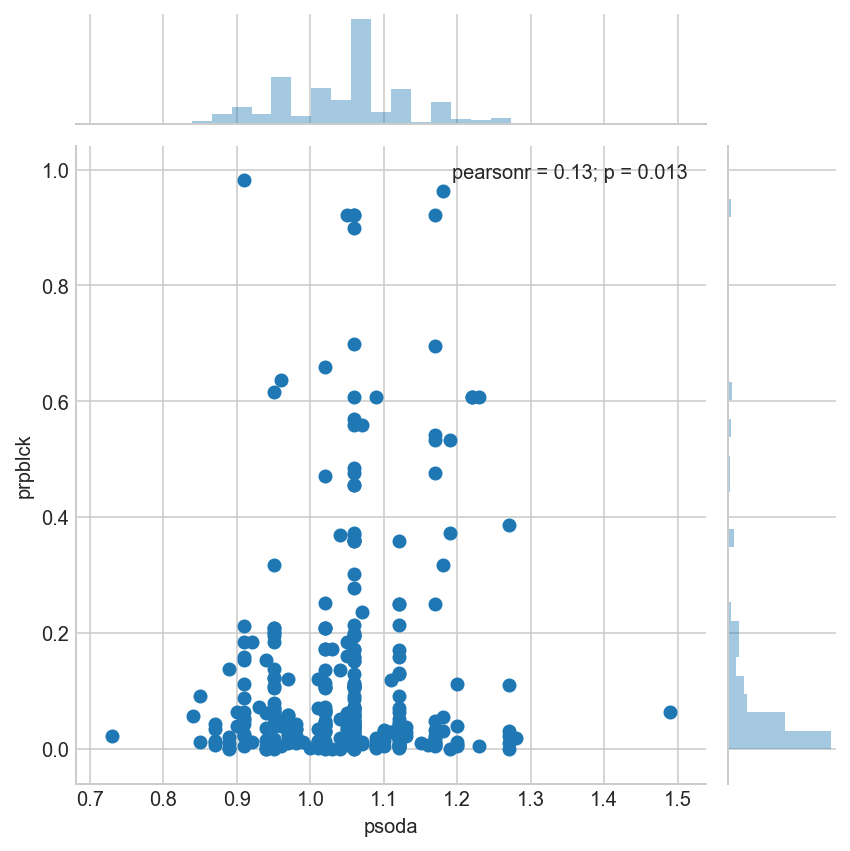

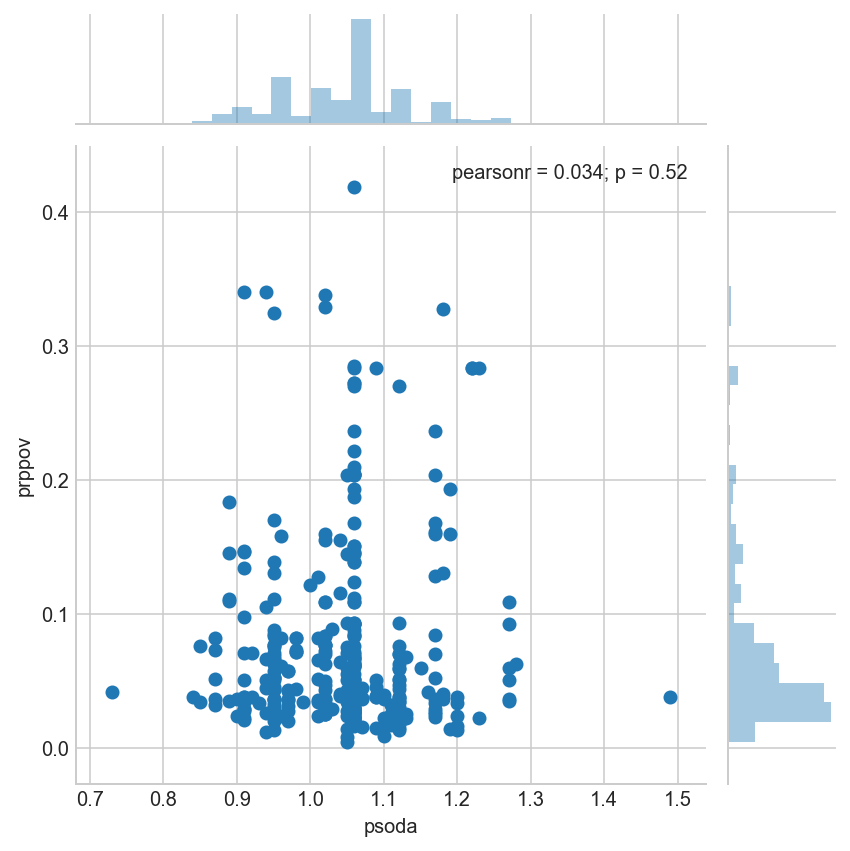

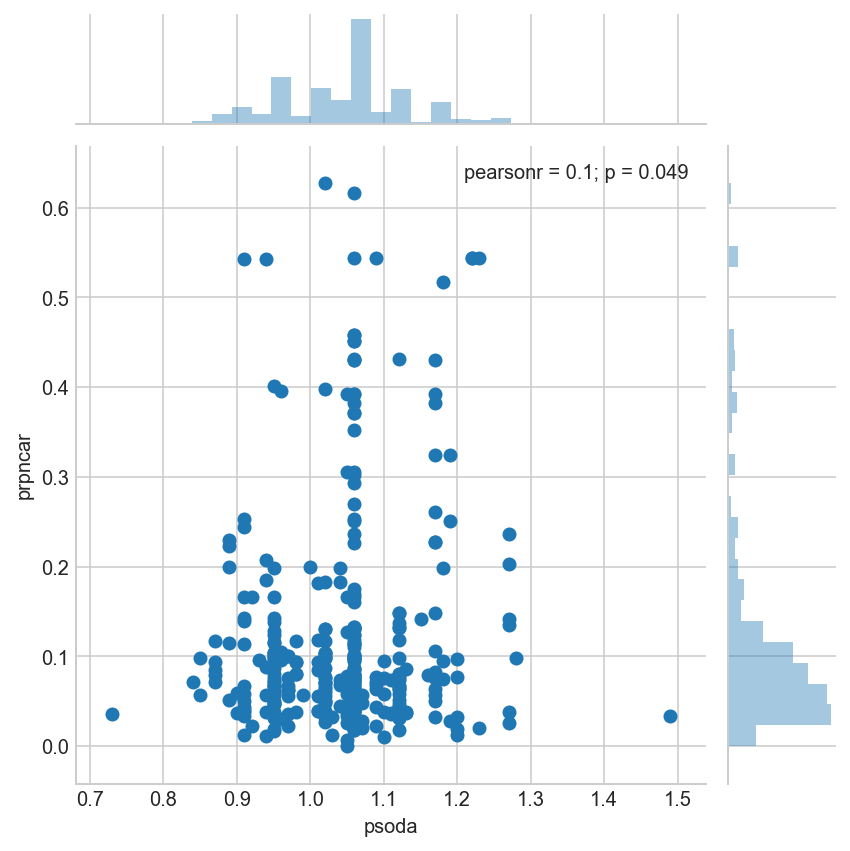

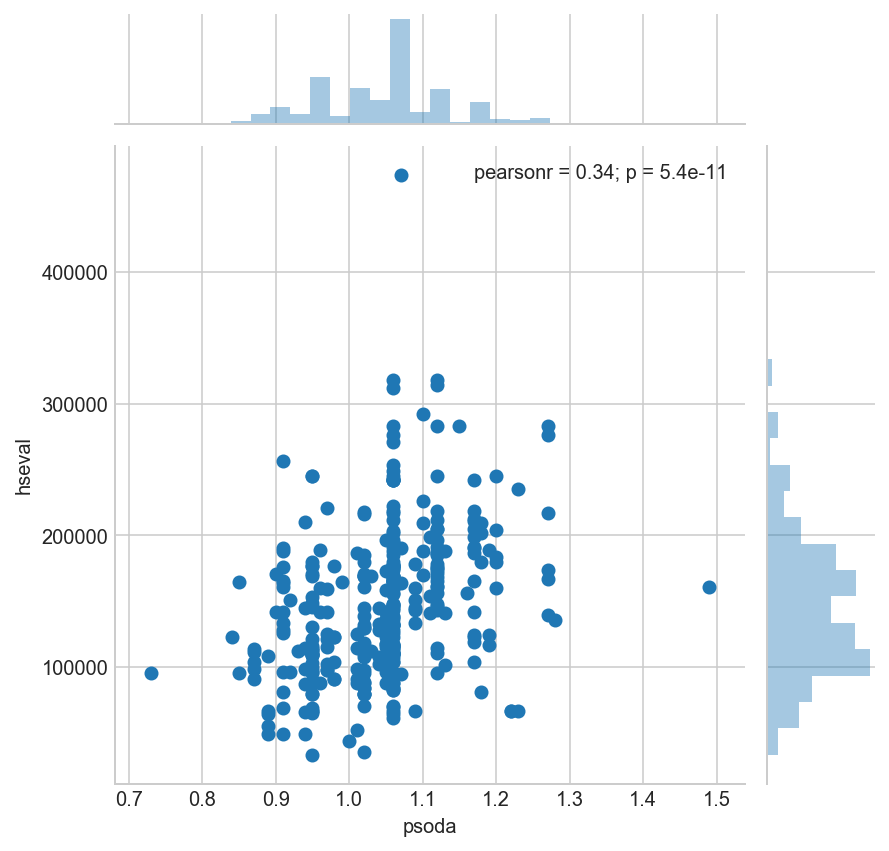

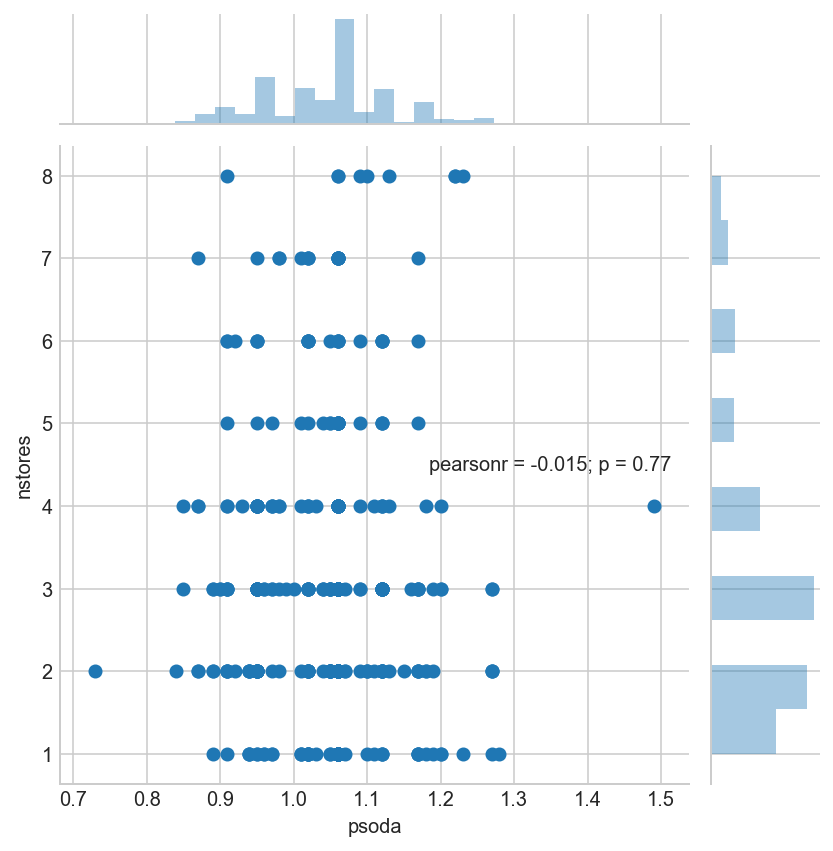

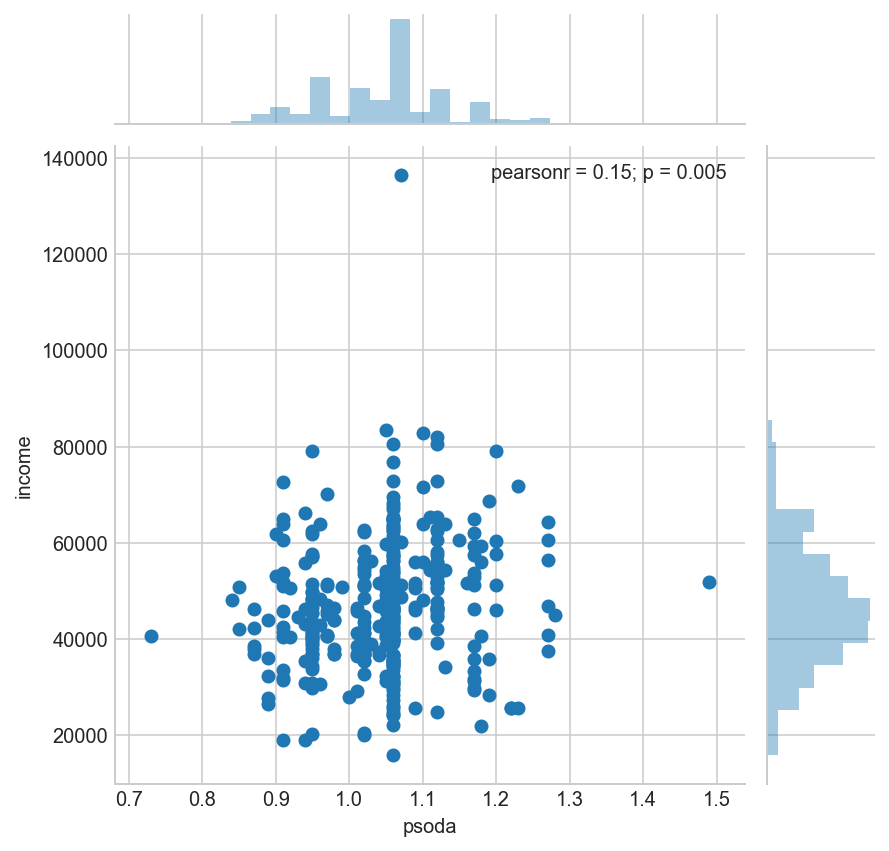

In [91]:
for c in features_num:
    if c!='psoda':
        sns.jointplot(data=df,x='psoda',y=c)

### Let's create an aggregate columns for price

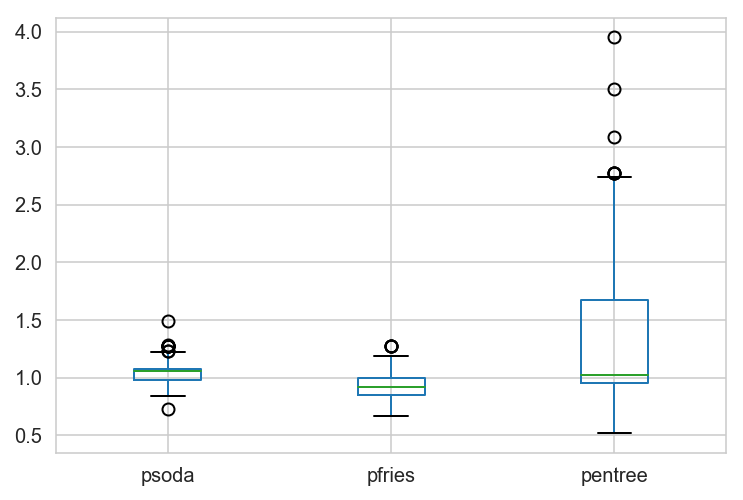

In [28]:
df[['psoda','pfries','pentree']].boxplot()

What is this big difference in the entree price??  
Let's check if it depends on the chain.

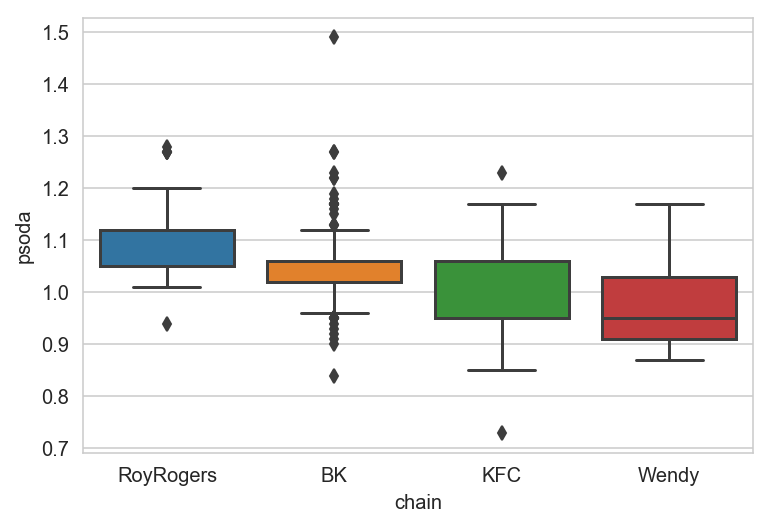

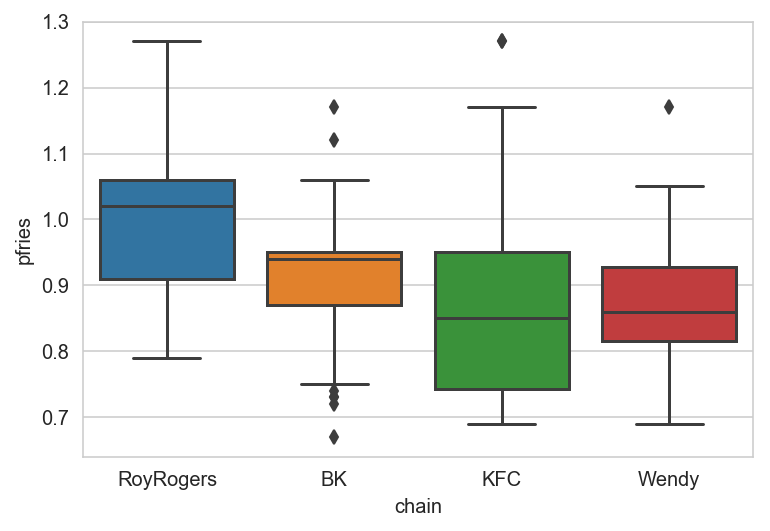

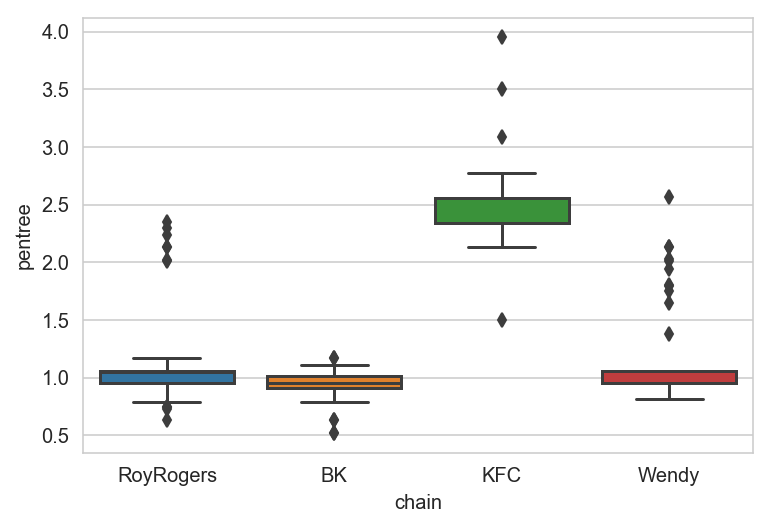

In [29]:
sns.boxplot(data=df,x='chain',y='psoda')
plt.show()
sns.boxplot(data=df,x='chain',y='pfries')
plt.show()
sns.boxplot(data=df,x='chain',y='pentree')

KFC has a very high entree price compared to the rest of the chains!  


Question 2: Is there a relation between KFC and areas with more black people? We can use chi2!

Text(0,0.5,'% of black people')

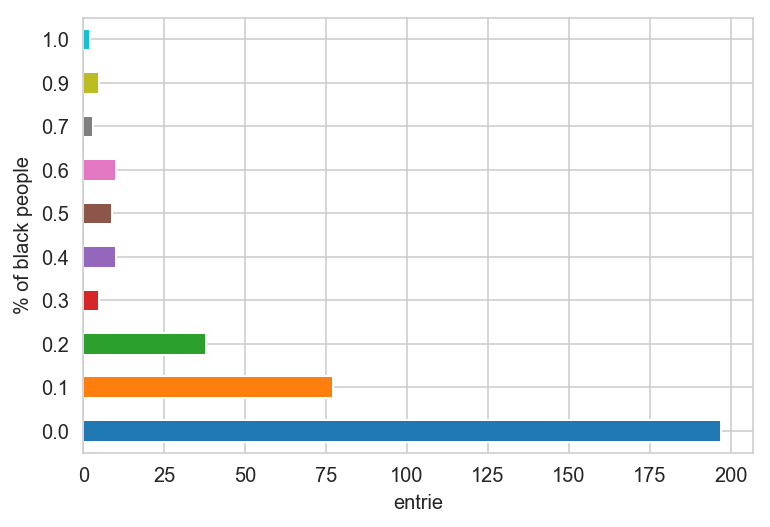

In [30]:
df['prpblck'].apply(lambda x: round(x,1)).value_counts().sort_index().plot(kind='barh')
plt.xlabel('entrie')
plt.ylabel('% of black people')

Let's split into areas with < 10% of black ppl and areas with >=10%

In [31]:
len(df[df['prpblck']<0.1]), len(df[df['prpblck']>=0.1])

(245, 111)

In [32]:
df[df['prpblck']<0.1]['chain'].value_counts().sort_index()

BK           111
KFC           38
RoyRogers     59
Wendy         37
Name: chain, dtype: int64

In [33]:
df[df['prpblck']>=0.1]['chain'].value_counts().sort_index()

BK           35
KFC          36
RoyRogers    25
Wendy        15
Name: chain, dtype: int64

In [34]:
from scipy.stats import chi2_contingency
obs = [df[df['prpblck']<0.1]['chain'].value_counts().sort_index().values,
       df[df['prpblck']>=0.1]['chain'].value_counts().sort_index().values]

chi, p, dof, expctd = chi2_contingency(obs)
print(chi,p)

14.268684886539194 0.00256132864962161


*Conclusions*:  
1- there is a statistical difference between the distributions of the chains in areas with low proportion of black people (< 10%) and areas with high proportion of black people (>=10%).   
2- There are a lot more Burger King shops in area with a low proportion of black people.   
3- Since KFC entrees are more expensive, this can be an underliying factor for different prices in areas with more black people.  
4- A possible solution is to remove the entree price from the final meal price, in order to remove the skew introducted by KFC

In [35]:
df['meal_price'] = df['psoda'] + df['pfries'] # + df['pentree']

### What is the correlation between this new aggregate price and the proportion of black people?
#### NOTE: probably removing entree is not enough! We should considering also the impact of each restaurant in the final price: e.g. more Roy Rogers --> higher prices. A solution can be the use of a linear regression model

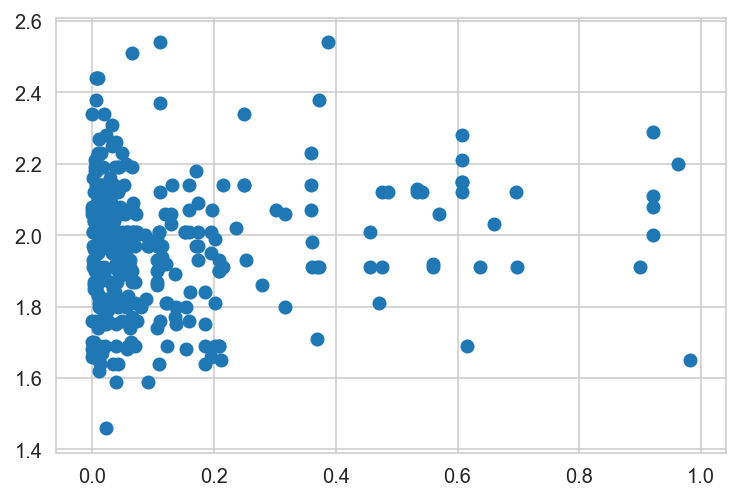

In [36]:
plt.scatter(df['prpblck'],df['meal_price'])

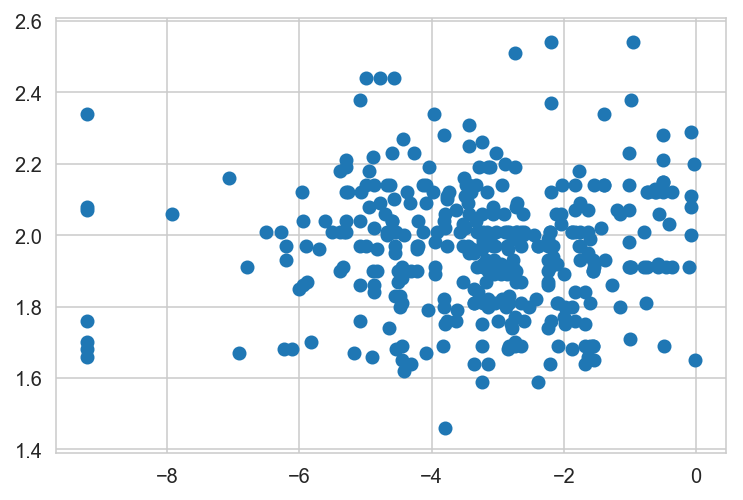

In [37]:
plt.scatter(np.log(0.0001+df['prpblck']),df['meal_price'])

In [38]:
df_temp = df[['prpblck','meal_price']].copy()
df_temp['prpblck'] = df_temp['prpblck'].apply(lambda x: round(x,1))
df_temp.head()

prpblck  meal_price
0      0.2        2.18
1      0.2        1.97
2      0.0        1.97
3      0.1        2.14
5      0.1        2.01

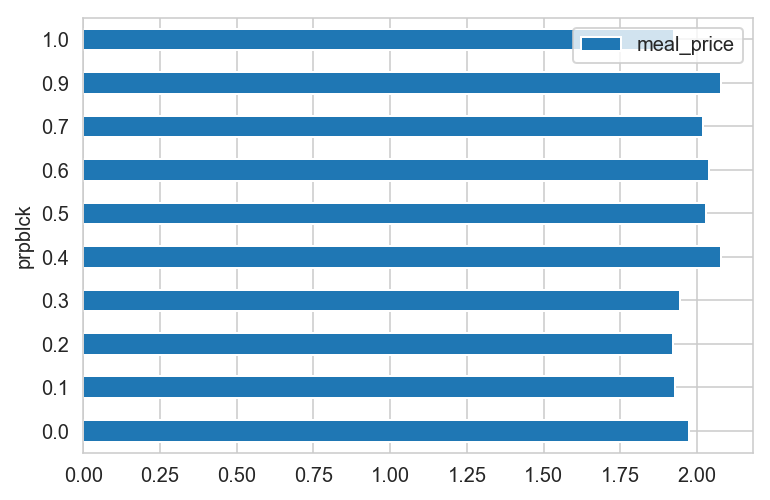

In [39]:
df_temp.groupby('prpblck').mean().plot(kind='barh')

It doesn't really seem to exist a correlation between prpblck and the price.

In [285]:
# sns.jointplot(data=df,x='psoda',y='pfries')
# sns.jointplot(data=df,x='psoda',y='pentree')
# sns.jointplot(data=df,x='pentree',y='pfries')

### Let's try to build a linear regression to predict the price

In [138]:
print(list(df.columns.values))

['psoda', 'pfries', 'pentree', 'wagest', 'nmgrs', 'hrsopen', 'emp', 'compown', 'chain', 'density', 'crmrte', 'state', 'prpblck', 'prppov', 'prpncar', 'hseval', 'nstores', 'income', 'county', 'meal_price']


In [139]:
cols = [#'psoda', 
         #'pfries', 
         #'pentree',
         'wagest', 
         #'nmgrs', 
         'hrsopen',
         'emp', 
         'compown', 
         'chain', 
         'density', 
         'crmrte', 
         'state', 
         'prpblck', 
         'prppov', 
         'prpncar', 
         'hseval', 
         'nstores', 
         'income', 
         'county', 
         'meal_price']

In [140]:
features_cat

['compown', 'chain', 'state', 'county']

In [143]:
for f in features_cat:
    print(df.groupby(f).size())
    print('-'*20)

compown
0    232
1    124
dtype: int64
--------------------
chain
BK           146
KFC           74
RoyRogers     84
Wendy         52
dtype: int64
--------------------
state
NJ    286
PA     70
dtype: int64
--------------------
county
1     12
2     29
3      1
4     11
5     19
6     29
7      4
8      3
9      7
10    25
11    13
12    18
13     1
14     7
15    13
16     3
17     9
18    25
19    19
20    29
21    19
22     3
23    15
24    12
25     3
26     7
27     4
28    13
29     3
dtype: int64
--------------------


Let's manage categorical features

In [146]:
 pd.get_dummies(df['chain'], prefix='chain', prefix_sep='_', drop_first=True)

chain_KFC  chain_RoyRogers  chain_Wendy
0            0                1            0
1            0                0            0
2            0                0            0
3            0                1            0
5            0                0            0
6            0                0            0
7            0                1            0
9            0                1            0
10           1                0            0
11           0                0            1
12           1                0            0
13           0                0            0
14           0                0            0
15           0                0            0
16           0                0            0
17           0                0            1
18           0                0            0
19           0                1            0
20           0                0            0
21           0                0            0
23           0                0            1
24           0                0            0
25           0                0            1
26           0                1            0
27           0                0            0
28           0                0            0
29           0                0            1
30           0                1            0
32           0                1            0
33           1                0            0
..         ...              ...          ...
378          0                0            0
379          0                0            0
380          0                0            0
381          1                0            0
383          0                0            1
385          0                0            0
386          0                1            0
387          0                0            1
388          1                0            0
389          0                0            0
390          0                1            0
391          0                0            1
392          0                1            0
393          1                0            0
394          0                0            0
395          0                1            0
396          0                0            0
397          0                0            0
398          0                1            0
399          0                0            0
400          0                1            0
401          0                0            1
402          0                1            0
403          0                0            0
404          1                0            0
405          0                1            0
406          1                0            0
407          0                0            0
408          0                0            0
409          0                0            0

[356 rows x 3 columns]

In [150]:
df.head()

psoda  pfries  pentree  wagest  nmgrs  hrsopen   emp  compown      chain  \
0   1.12    1.06     1.02    4.25    3.0     16.0  27.5        1  RoyRogers   
1   1.06    0.91     0.95    4.75    3.0     16.5  21.5        0         BK   
2   1.06    0.91     0.98    4.25    3.0     18.0  30.0        0         BK   
3   1.12    1.02     1.06    5.00    4.0     16.0  27.5        0  RoyRogers   
5   1.06    0.95     1.01    4.25    4.0     15.0  17.5        0         BK   

   density    crmrte state   prpblck    prppov   prpncar    hseval  nstores  \
0   4030.0  0.052887    NJ  0.171154  0.036579  0.078843  148300.0        3   
1   4030.0  0.052887    NJ  0.171154  0.036579  0.078843  148300.0        3   
2  11400.0  0.036000    NJ  0.047360  0.087907  0.269430  169200.0        3   
3   8345.0  0.048423    NJ  0.052839  0.059123  0.136690  171600.0        3   
5   4424.0  0.033482    NJ  0.059133  0.083500  0.115134  148000.0        2   

    income  county  meal_price  
0  44534.0      18        3.20  
1  44534.0      18        2.92  
2  41164.0      12        2.95  
3  50366.0      10        3.20  
5  44515.0      18        3.02

In [152]:
df.groupby(['county','prpblck']).size()

county  prpblck 
1       0.039854    2
        0.070283    3
        0.361209    2
        0.607332    5
2       0.000000    2
        0.002470    1
        0.003234    1
        0.004454    3
        0.004733    1
        0.006690    2
        0.008314    2
        0.010212    2
        0.010585    1
        0.012478    1
        0.013911    1
        0.019644    1
        0.028208    1
        0.030893    1
        0.031873    1
        0.031984    2
        0.039289    1
        0.039404    1
        0.201391    1
        0.249817    3
3       0.001022    1
4       0.000892    1
        0.010356    2
        0.011523    1
        0.016648    1
        0.022145    1
                   ..
24      0.009989    5
        0.016695    2
        0.035449    1
        0.369483    1
        0.485901    1
        0.542258    1
25      0.007883    2
        0.278468    1
26      0.001397    1
        0.006189    1
        0.011629    1
        0.014684    1
        0.236974    1
        0.35989

In [149]:
df.groupby('county').size()

county
1     12
2     29
3      1
4     11
5     19
6     29
7      4
8      3
9      7
10    25
11    13
12    18
13     1
14     7
15    13
16     3
17     9
18    25
19    19
20    29
21    19
22     3
23    15
24    12
25     3
26     7
27     4
28    13
29     3
dtype: int64

Let's not use the county for now

# Approach: regression

In [272]:
df_temp = df[['prpblck','meal_price']].copy()
df_temp['prpblck'] = df_temp['prpblck'].apply(lambda x: round(x,1))
df_temp.head()

prpblck  meal_price
0      0.2        3.20
1      0.2        2.92
2      0.0        2.95
3      0.1        3.20
5      0.1        3.02

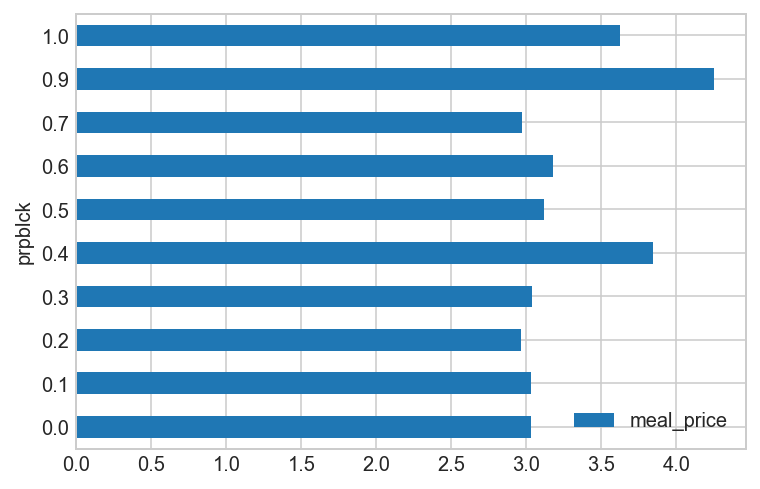

In [276]:
df_temp.groupby('prpblck').median().plot(kind='barh')

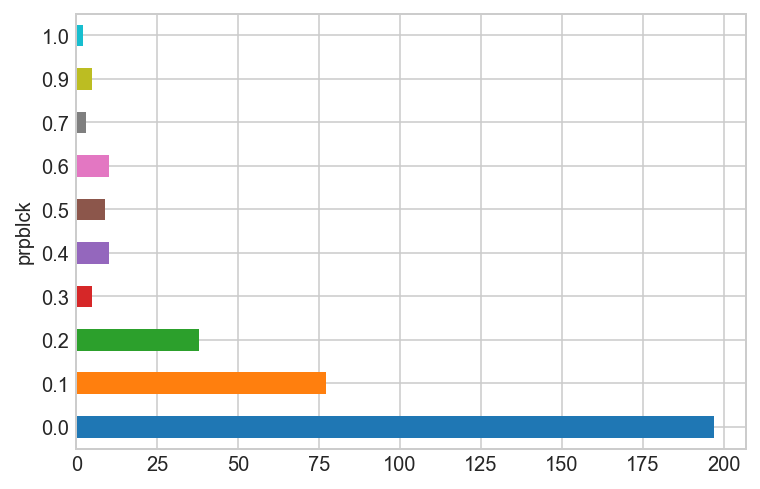

In [277]:
df_temp.groupby('prpblck').size().plot(kind='barh')

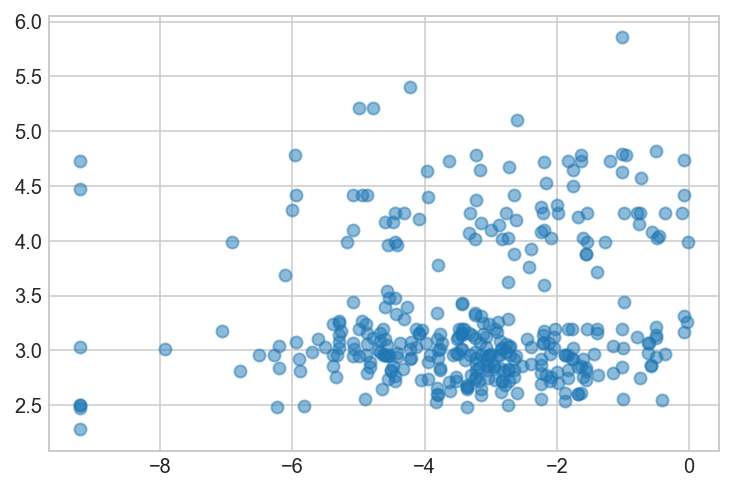

In [249]:
plt.scatter(x=np.log(0.0001+df['prpblck']),y=y, alpha=0.5)

In [250]:
X = np.log(0.0001+df['prpblck'])
X = sm.add_constant(X)
y = df['meal_price']

In [251]:
model = OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             meal_price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.062
Date:                Fri, 22 Jun 2018   Prob (F-statistic):            0.00823
Time:                        11:24:35   Log-Likelihood:                -350.84
No. Observations:                 356   AIC:                             705.7
Df Residuals:                     354   BIC:                             713.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4694      0.073     47.269      0.000       3.325       3.614
prpblck        0.0528      0.020      2.657      0.008       0.014       0.092
==============================================================================
Omnibus:                       63.619   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.190
Skew:                           1.207   Prob(JB):                     5.81e-21
Kurtosis:                       3.675   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let's build a simple model with just chain and proportion of black ppl to try to predict the price 

In [203]:
import statsmodels.api as sm

In [253]:
X = pd.concat([np.log(0.0001+df['prpblck']), 
               pd.get_dummies(df['chain'], prefix='chain', prefix_sep='_', drop_first=True)],
              axis=1)

X = sm.add_constant(X)

y = df['meal_price']

In [255]:
X.shape, y.shape

((356, 5), (356,))

In [256]:
model = OLS(y,X)
results = model.fit()

In [257]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             meal_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     213.8
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           1.00e-92
Time:                        11:26:06   Log-Likelihood:                -134.61
No. Observations:                 356   AIC:                             279.2
Df Residuals:                     351   BIC:                             298.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.9159      0.050     58.523      0.000       2.818       3.014
prpblck            -0.0003      0.011     -0.031      0.975      -0.022       0.021
chain_KFC           1.4345      0.052     27.770      0.000       1.333       1.536
chain_RoyRogers     0.2869      0.049      5.853      0.000       0.190       0.383
chain_Wendy         0.0978      0.058      1.696      0.091      -0.016       0.211
==============================================================================
Omnibus:                      129.298   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.875
Skew:                           1.579   Prob(JB):                    8.47e-106
Kurtosis:                       7.759   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
df.columns

Index([u'psoda', u'pfries', u'pentree', u'wagest', u'nmgrs', u'hrsopen',
       u'emp', u'compown', u'chain', u'density', u'crmrte', u'state',
       u'prpblck', u'prppov', u'prpncar', u'hseval', u'nstores', u'income',
       u'county', u'meal_price'],
      dtype='object')

### Let's add a state, density, crmrte, prppov

In [200]:
X = pd.concat([df[['prpblck','density', 'crmrte', 'prppov']], 
               pd.get_dummies(df['chain'], prefix='chain', prefix_sep='_', drop_first=True),
               (df['state'] == 'NJ').astype(int)],
              axis=1)
X = sm.add_constant(X)
y = df['meal_price']

In [201]:
X.shape, y.shape

((356, 9), (356,))

In [202]:
model = OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             meal_price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     122.4
Date:                Thu, 21 Jun 2018   Prob (F-statistic):           3.47e-96
Time:                        17:14:47   Log-Likelihood:                -115.72
No. Observations:                 356   AIC:                             249.4
Df Residuals:                     347   BIC:                             284.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.7443      0.051     53.734      0.000       2.644       2.845
prpblck             0.1396      0.142      0.986      0.325      -0.139       0.418
density          1.049e-05   3.93e-06      2.671      0.008    2.77e-06    1.82e-05
crmrte              0.9503      0.536      1.774      0.077      -0.103       2.004
prppov             -1.4094      0.430     -3.275      0.001      -2.256      -0.563
chain_KFC           1.4346      0.050     28.838      0.000       1.337       1.532
chain_RoyRogers     0.2669      0.047      5.675      0.000       0.174       0.359
chain_Wendy         0.1333      0.055      2.411      0.016       0.025       0.242
state               0.1974      0.048      4.151      0.000       0.104       0.291
==============================================================================
Omnibus:                      143.445   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.411
Skew:                           1.718   Prob(JB):                    1.71e-133
Kurtosis:                       8.423   Cond. No.                     2.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Let's add a median house value, number of stores, income, starting wadge

In [ ]:
hseval        median housing value, zipcode
nstores       number of stores, zipcode
income 

In [190]:
df.columns

Index([u'psoda', u'pfries', u'pentree', u'wagest', u'nmgrs', u'hrsopen',
       u'emp', u'compown', u'chain', u'density', u'crmrte', u'state',
       u'prpblck', u'prppov', u'prpncar', u'hseval', u'nstores', u'income',
       u'county', u'meal_price'],
      dtype='object')

In [191]:
X = pd.concat([df[['prpblck','density', 'crmrte', 'prppov','hseval','nstores','income','wagest']], 
               pd.get_dummies(df['chain'], prefix='chain', prefix_sep='_', drop_first=True),
               (df['state'] == 'NJ').astype(int)],
              axis=1)

y = df['meal_price']

In [192]:
X.shape, y.shape

((356, 12), (356,))

In [193]:
model = OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             meal_price   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2325.
Date:                Thu, 21 Jun 2018   Prob (F-statistic):          6.84e-321
Time:                        17:11:54   Log-Likelihood:                -152.13
No. Observations:                 356   AIC:                             328.3
Df Residuals:                     344   BIC:                             374.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
prpblck            -0.0329      0.160     -0.205      0.837      -0.348       0.282
density          9.463e-06   4.74e-06      1.995      0.047    1.31e-07    1.88e-05
crmrte              0.6833      0.656      1.042      0.298      -0.607       1.974
prppov              0.2966      0.569      0.521      0.603      -0.823       1.416
hseval           1.435e-06   7.89e-07      1.819      0.070   -1.16e-07    2.99e-06
nstores             0.0017      0.013      0.134      0.894      -0.023       0.026
income          -1.066e-06   3.85e-06     -0.277      0.782   -8.63e-06     6.5e-06
wagest              0.5396      0.031     17.187      0.000       0.478       0.601
chain_KFC           1.4219      0.056     25.429      0.000       1.312       1.532
chain_RoyRogers     0.2202      0.053      4.153      0.000       0.116       0.325
chain_Wendy         0.0508      0.063      0.807      0.420      -0.073       0.175
state               0.2176      0.057      3.800      0.000       0.105       0.330
==============================================================================
Omnibus:                      100.810   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.035
Skew:                           1.323   Prob(JB):                     4.22e-61
Kurtosis:                       6.427   Cond. No.                     6.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""